# Regression: Linear Regression

Linear Regression is a **Supervised Learning method**, where the predicted output will be continuous in nature. Examples include predicting prices, grades, and other continuous outcomes.

It's a foundational statistical and machine learning technique for modeling the relationship between a dependent variable (the target or response variable) and one or more independent variables (predictors or features).

The objective is to establish a linear equation that best represents the connection between these variables. This enables predictions and insights to be drawn from the data.

The primary aim of linear regression is to identify the "best-fit" line (or hyperplane in multiple dimensions) that minimizes the discrepancies between predicted values and observed actual values.

This best-fit line is represented by the linear equation:

$$
Y = b_0 + b_1X_1 + b_2X_2 + \dots + b_nX_n
$$

Where:
- $Y$ represents the dependent variable we wish to predict.
- $(X_1, X_2, \dots, X_n)$ are the independent variables or features.
- $(b_0)$ is the intercept (the value of \(Y\) when all \(X\) values are zero).
- $(b_1, b_2, \dots, b_n)$ are the coefficients defining the relationship between each independent variable and the dependent variable.

Linear regression assumes a linear relationship between the predictors and the target variable.

The model's goal is to estimate the coefficients $(b_0, b_1, \ldots, b_n)$ that minimize the sum of the squared differences between the predicted and actual values in the training data, a process often termed as "fitting the model."


# Linear Regression Example – Car Price Prediction Model

In this example, we'll explore how to predict car prices by building a Linear Regression model using a dataset of used cars. The dataset comes from [Kaggle](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho) and contains information about used cars, making it an excellent resource for demonstrating linear regression in Machine Learning.

## Dataset Overview

The dataset includes the following columns:

- `name`: The make and model of the car.
- `year`: The year the car was manufactured.
- `selling_price`: The price at which the car is being sold.
- `km_driven`: The total kilometers driven by the car.
- `fuel`: The type of fuel the car uses (e.g., Petrol, Diesel, CNG, etc.).
- `seller_type`: Whether the seller is an individual or a dealer.
- `transmission`: The type of transmission in the car (Automatic or Manual).
- `owner`: The number of previous owners the car has had.

## Goal

Our objective is to predict the `selling_price` of a car based on its features, such as `year`, `km_driven`, `fuel`, `seller_type`, `transmission`, and `owner` status. By applying Linear Regression, we aim to model the relationship between these features and the car's selling price to make accurate predictions.


In [1]:
# Import pandas library
import pandas as pd

# Import the dataset
df = pd.read_csv('car data.csv')

# Pre-process the dataset (starting with displaying the dataset's info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [2]:
# Returns the number of unique car names in our dataset
df['Car_Name'].nunique()

98

In [3]:
# Dropping the 'Car_Name' column as it's highly cardinal and not as relevant for a basic linear model
df.drop('Car_Name', axis=1, inplace=True)

Feature Engineering ("Age" Column Creation): The purpose of creating an "Age" column is to transform the year data into a more directly useful metric for analysis or modeling. In many contexts, especially in vehicle valuation, the age of a vehicle is more relevant than the year it was made. The calculation uses the maximum year found in the dataset plus one to ensure that the age is calculated relative to the year following the most recent year in the dataset. This approach accounts for the dataset's time frame and provides a uniform age metric across all entries.

Removing the "Year" Column: Once the "Age" column has been created, the original "Year" column is dropped from the DataFrame. This step is taken because the "Year" information is now encapsulated in the "Age" column, and keeping the "Year" column would be redundant. Additionally, removing unnecessary or redundant columns simplifies the dataset and can help improve model performance by focusing on more relevant features.

In [4]:
# Insert a new column named "Age" at the beginning (index 0) of the DataFrame. 
# The "Age" column is calculated based on the maximum year found in the "Year" column plus one, minus the "Year" column itself.
# This effectively transforms the "Year" of the car into its "Age" at the time of the analysis.
df.insert(0, "Age", df["Year"].max() + 1 - df["Year"])

# Remove the "Year" column from the DataFrame as it's no longer needed after transforming it into the "Age" column.
df.drop('Year', axis=1, inplace=True)

# Finding Outliers Using the Interquartile Range (IQR)

Outliers are data points that differ significantly from other observations in the dataset. These can be caused by measurement errors, data entry errors, or extreme variation in the data. Outliers can significantly affect the results of data analysis and statistical modeling.

## The IQR Method for Outlier Detection

The IQR is a measure of statistical dispersion and is calculated as the difference between the 75th percentile (Q3) and 25th percentile (Q1) in the data. This range defines the middle 50% of the data points.

The IQR can be used to identify outliers with these steps:

1. Calculate the first (Q1) and third (Q3) quartiles of the dataset.
2. Compute the IQR by subtracting Q1 from Q3: `IQR = Q3 - Q1`
3. Determine the "minimum" threshold as `Q1 - 1.5 * IQR`.
4. Determine the "maximum" threshold as `Q3 + 1.5 * IQR`.
5. Any data points outside these thresholds are considered outliers.

Here's a visual representation of the IQR and how it's used to detect outliers:

<img src="image-26.png" alt="My Image" width="500"/>

The pink box represents the interquartile range, with the line inside indicating the median of the data. The "whiskers" on either side of the IQR box extend to the minimum and maximum thresholds. Points beyond these whiskers are considered outliers.

Categorical columns will have the datatype as "object". Let's group the numerical columns and categorical columns in a NumPy array. The first 5 elements in the array will be numerical columns and the rest 3 will be categorical columns. We can plot the data in the columns using the seaborn library. Categorical columns will contain multiple bars, whereas numerical columns will contain single bars.

Let's try to find the outliers in our dataset using the following code:

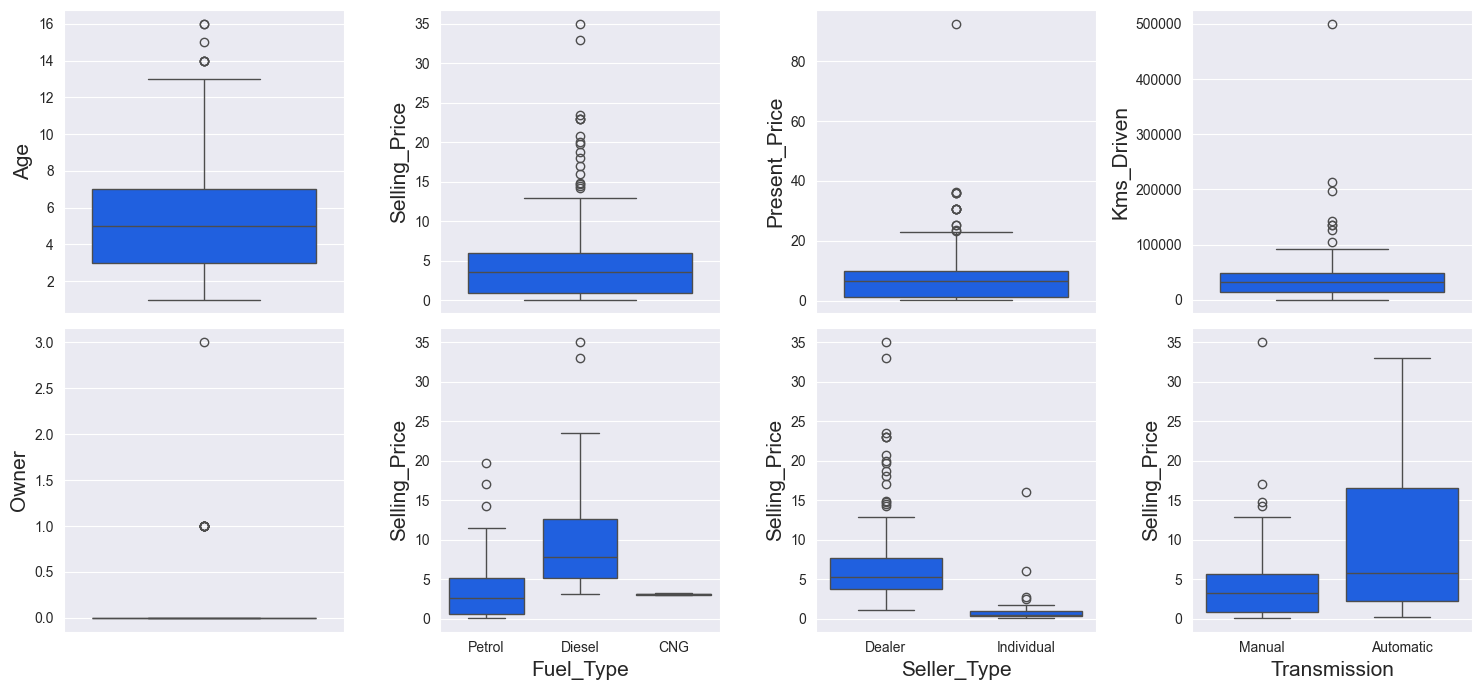

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values,  df.select_dtypes(include='object').columns.values])

fig, ax = plt.subplots(2, 4, figsize=(15,7),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4
    if i<5:
        sns.boxplot(data=df, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df, x=col, y='Selling_Price', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()    
plt.show()

Let's try to find the outliers using the InterQuartile Range rule: 

In [6]:
outliers_indexes = []
target = 'Selling_Price'

for col in df.select_dtypes(include='object').columns:
    for cat in df[col].unique():
        df1 = df[df[col] == cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = df1[(df1[target] < minimum) | (df1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())
        
        
for col in df.select_dtypes(exclude='object').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = df[(df[col] < minimum) | (df[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())
    
outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

38 outliers were identified, whose indices are:

[27, 37, 39, 50, 51, 52, 53, 54, 179, 184, 58, 59, 189, 62, 63, 64, 191, 66, 192, 196, 69, 193, 198, 201, 77, 205, 79, 80, 82, 84, 85, 86, 92, 93, 96, 97, 106, 241]


But keep in mind that it's not always the right decision to remove the outliers. They can be legitimate observations and it’s important to investigate the nature of the outlier before deciding whether to drop it or not.

We can delete outliers in two cases:

Outlier is due to incorrectly entered or measured data
Outlier creates a significant association
Let's dig even more and find the perfect outliers.

To do that, let's assume that if the selling price is more than 33 Lakhs or if the car has been driven more than 400,000 Kilometers, those are outliers. We'll mark them in green. Save all the indices in the removing_indices variable. Plot them in the scatterplot format using seaborn library, comparing each column against our target column.

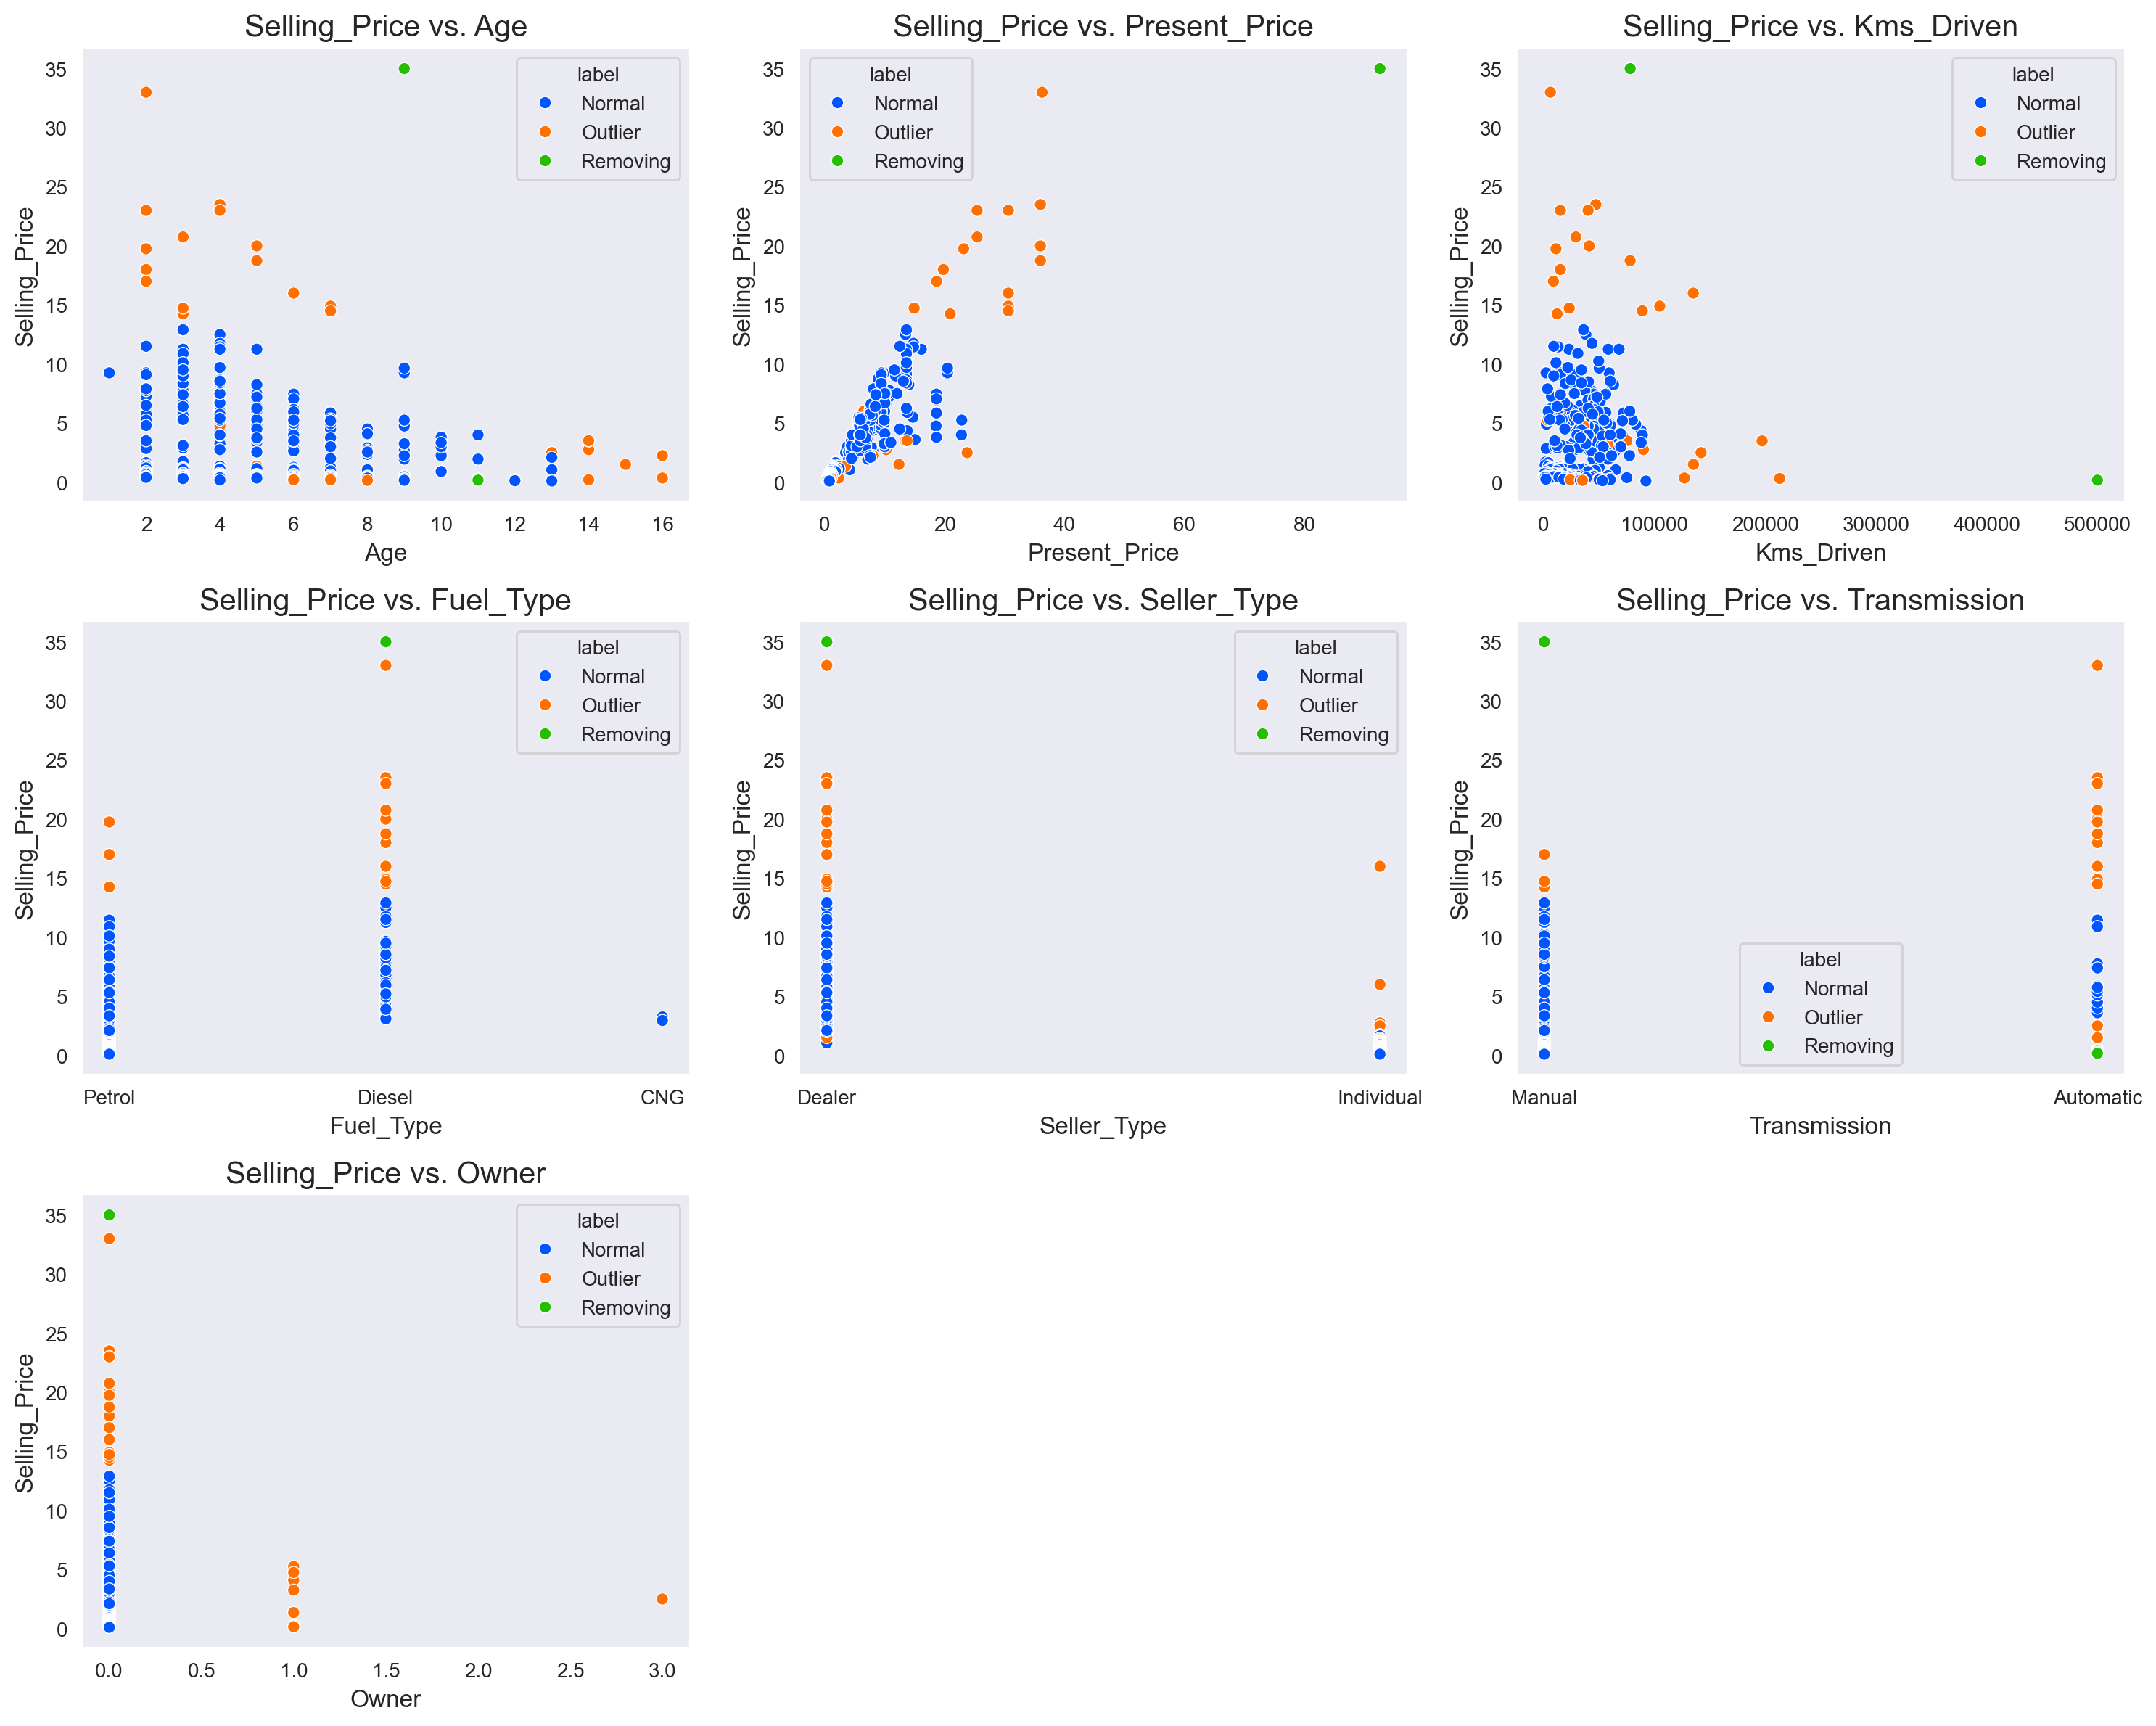

In [7]:
# Outliers Labeling
df1 = df.copy()
df1['label'] = 'Normal'
df1.loc[outliers_indexes,'label'] = 'Outlier'

# Removing Outliers
removing_indexes = []
removing_indexes.extend(df1[df1[target]>33].index)
removing_indexes.extend(df1[df1['Kms_Driven']>400000].index)
df1.loc[removing_indexes,'label'] = 'Removing'

# Plot
target = 'Selling_Price'
features = df.columns.drop(target)
colors = ['#0055ff','#ff7000','#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=3 ,ncols=3, figsize=(15,12), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=df1, x=features[i], y=target, hue='label', ax=ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()

ax[2, 1].axis('off')
ax[2, 2].axis('off')
plt.tight_layout()
plt.show()

In [8]:
# Let's see the perfect outliers:

removing_indexes = list(set(removing_indexes))
removing_indexes

[196, 86]

In [9]:
# We got 2. We have to remove them. But before that, we have to check if there's any null data in our dataset.

df.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
# Let's remove the identified outliers and reset the index of the dataframe.

df1 = df.copy()
df1.drop(removing_indexes, inplace=True)
df1.reset_index(drop=True, inplace=True)

## Analyze the Dataset
Let's analyze the data to see how much each field/category is correlated with the selling price of the car. We need to do some analysis on our dataset to be able to come to some conclusions about it.

To do that, we have to identify the numerical and categorical fields in our dataset, as the way to plot this differs for each type.

In [11]:
NumCols = ['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

## Bivariate Analysis

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

Let's compare the Selling Price with the other columns using Bivariate Analysis and try to derive some conclusions out of that data.

### Selling Price vs Numerical Features Bivariate Analysis
Let's compare the numerical features with the Selling Price using Bivariate analysis. The Numerical columns will be plotted in a scatter graph.

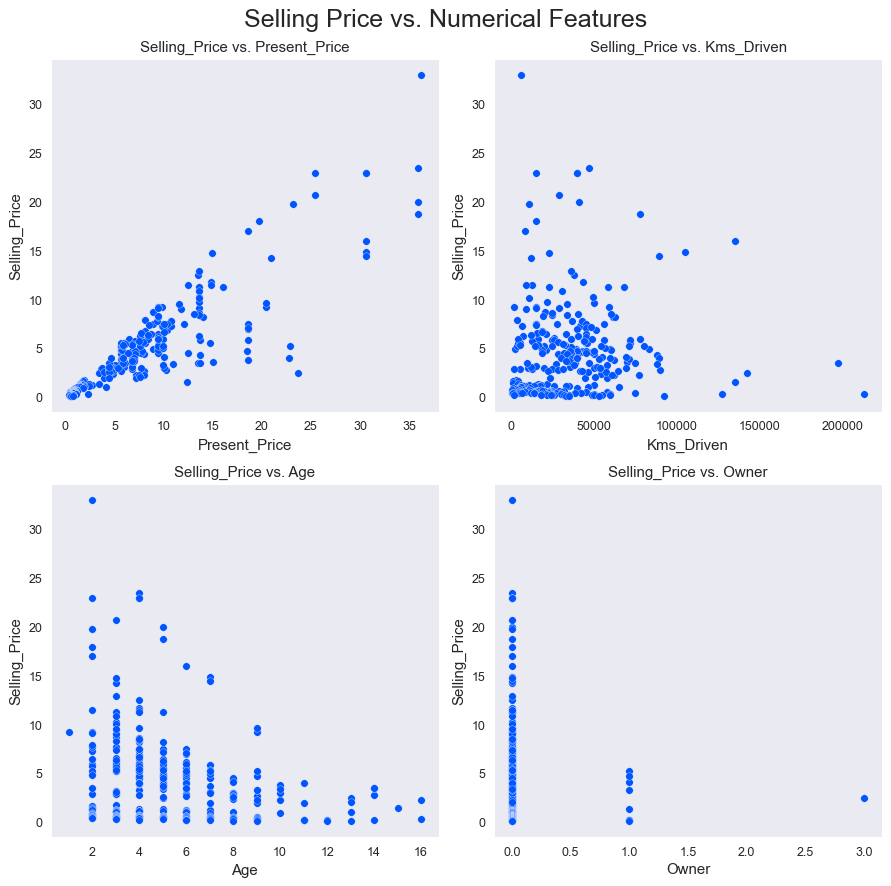

In [12]:
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(10,10), dpi=90)
num_features = ['Present_Price', 'Kms_Driven', 'Age', 'Owner']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(num_features)):
    row = i//2
    col = i%2
    ax[row,col].scatter(df1[num_features[i]], df1[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('Selling Price vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

* As Present Price increases, Selling Price increases as well. They're directly proportional. This plot shows a positive correlation between the present price of a car and its selling price.
* Selling_Price vs. Kms_Driven: The plot doesn't show a clear correlation between kilometers driven and the selling price. This suggests that the number of kilometers driven may not be a strong predictor of the selling price on its own. Most of the data points are concentrated in the lower range of kilometers driven, with the selling price decreasing slightly as kilometers increase.
* Selling Price is inversely proportional to the car's age. There appears to be a negative correlation between the age of the car and the selling price. Generally, as cars get older, their selling prices decrease. The concentration of points at the lower age and higher selling price suggests that newer cars tend to sell for more, as expected. 
* As the number of previous car owners increases, its Selling Price decreases. So Selling Price is inversely proportional to Owner. There's a noticeable decrease in selling price as the number of owners increases, which implies that cars with more previous owners tend to sell for less.

### Selling Price vs Categorical Features Bivariate Analysis

Let's compare the categorical features with the Selling Price using Bivariate analysis. The Categorical columns will be plotted in a stripplot graph. This gives the comparison among multiple values in a category.

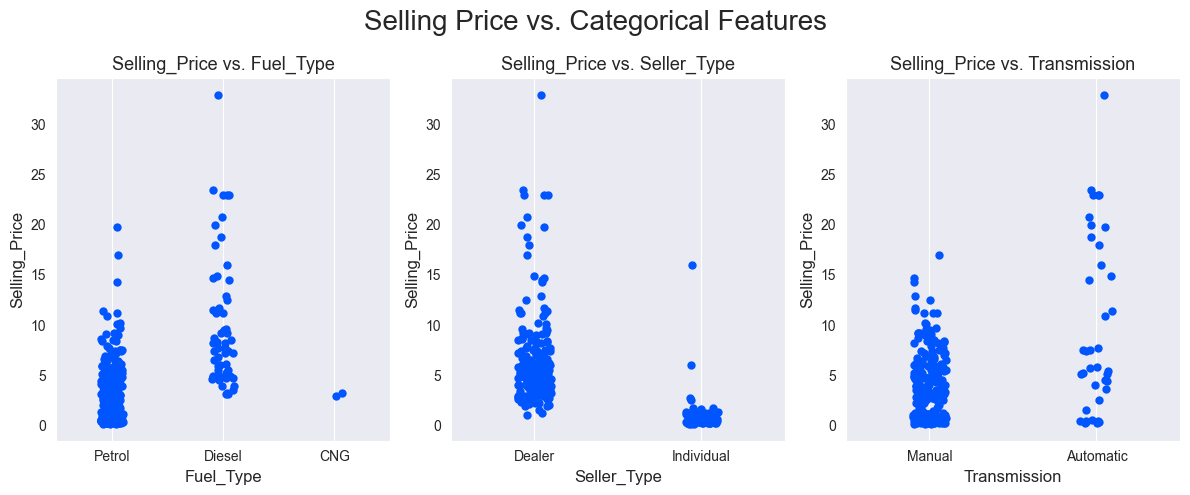

In [13]:
fig, axes = plt.subplots(nrows=1 ,ncols=3, figsize=(12,5), dpi=100)
cat_features = ['Fuel_Type', 'Seller_Type', 'Transmission']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(cat_features)):
    sns.stripplot(ax=axes[i], x=cat_features[i], y=target, data=df1, size=6, color=c)
    axes[i].set_title('{} vs. {}'.format(target, cat_features[i]), size = 13)
    axes[i].set_xlabel(cat_features[i], size = 12)
    axes[i].set_ylabel(target, size = 12)
    axes[i].grid()

plt.suptitle('Selling Price vs. Categorical Features', size = 20)
plt.tight_layout()
plt.show()

* Diesel Cars > CNG Cars > Petrol Cars in terms of Selling Price.
* The Selling Price of cars sold by individuals is lower than the price of cars sold by dealers.
* Automatic cars are more expensive than manual cars.

### Categorical Variables Encoding

We can't use the Categorical fields as they are. They have to be converted to numbers because machines can only understand numbers.

For an example, let's take the Fuel column. As per our dataset, we have cars running on two types of fuel. They are Petrol and Diesel. The categorical variable encoding will split the fuel column into 2 columns (Fuel_Type_Petrol and Fuel_Type_Diesel).

Let's assume a car runs on Petrol. For this car, the data will be converted as Fuel_Type_Petrol column set to 1 (True), and Fuel_Type_Diesel column set to 0 (False). Computers can understand 1 and 0 rather than "Petrol" and "Diesel".

To do that, we'll perform one-hot encoding for the categorical columns. Pandas offers the get_dummies method to encode the columns.

In [14]:
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

df1 = pd.get_dummies(df1, columns=CatCols, drop_first=True)
df1.head(5)

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,False,True,False,True
1,6,4.75,9.54,43000,0,True,False,False,True
2,2,7.25,9.85,6900,0,False,True,False,True
3,8,2.85,4.15,5200,0,False,True,False,True
4,5,4.60,6.87,42450,0,True,False,False,True


### Correlation Analysis

A correlation matrix is a matrix that summarizes the strength and direction of the linear relationships between pairs of variables in a dataset. It is a crucial tool in statistics and data analysis, used to examine the patterns of association between variables and understand how they may be related.

The correlation is directly proportional if the values are positive, and inversely proportional if the values are negative.

Here's the code to find the correlation matrix with relation to Selling Price.

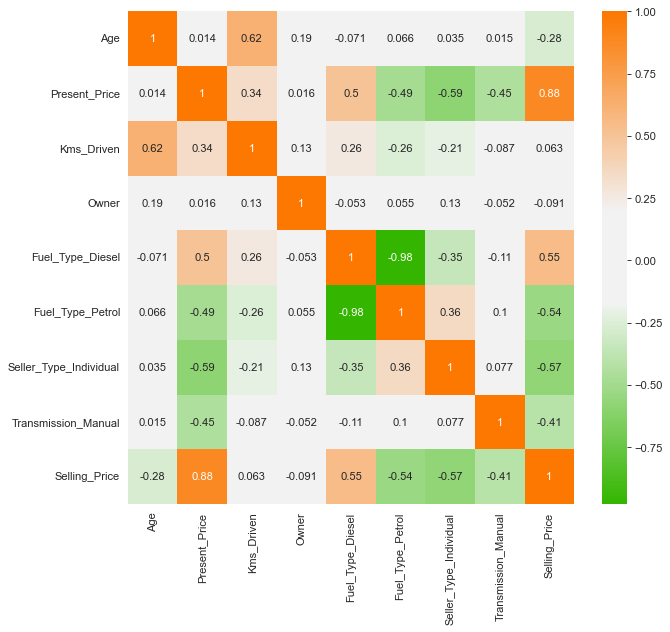

In [15]:
target = 'Selling_Price'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(pd.concat([df1.drop(target,axis=1), df1[target]],axis=1).corr(), annot=True, cmap=cmap)
plt.show()

From the above matrix, we can infer that the target variable "Selling Price" is highly correlated with Present Price, Seller Type, and Fuel Type.

### How to Build the Model

We have come to the final stage. Let's train and test our model.

Let's remove the "Selling_Price" from input and set it to output. This means that it has to be predicted.

In [16]:
X = df1.drop('Selling_Price', axis=1)
y = df1['Selling_Price']

In [17]:
# Let's split our dataset by taking 70% of data for training and 30% of data for testing.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [18]:
# Let's make a backup of our test data. We need this for the final comparison.

y_test_actual = y_test


### Normalize the dataset

The StandardScaler is a preprocessing technique commonly used in machine learning and data analysis to standardize or normalize the features (variables) of a dataset. Its primary purpose is to transform the data such that each feature has a mean (average) of 0 and a standard deviation of 1.

Let's normalize our dataset using StandardScaler.

It is very important that StandardScaler transformation should only be gotten from the training set, otherwise it will lead to data leakage.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Train the model

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
# Let's find the intercept and co-efficient for each column in our training dataset.

pd.DataFrame(data = np.append(linear_reg.intercept_ , linear_reg.coef_), index = ['Intercept']+[col+" Coef." for col in X.columns], columns=['Value']).sort_values('Value', ascending=False)


,Value
Intercept,4.302488
Present_Price Coef.,3.492729
Fuel_Type_Diesel Coef.,0.850217
Fuel_Type_Petrol Coef.,0.207319
Transmission_Manual Coef.,0.027375
Owner Coef.,-0.232722
Seller_Type_Individual Coef.,-0.377334
Kms_Driven Coef.,-0.589672
Age Coef.,-0.936339


### How to evaluate the model

Scikit Learn provides a metrics feature which helps us to measure the metrics of our model. We can use that to determine metrics include Mean Squared Error, Mean Absolute Error, Root Mean Squared Error, and R2-Score.

In [22]:
from sklearn import metrics

def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(linear_reg, X_test_scaled, y_test, 'Linear Reg.')

,Linear Reg.
MAE,1.198867
MSE,3.714913
RMSE,1.927411
R2-Score,0.887245


### Evaluate the model using K-fold Cross-Validation

In k-fold cross-validation, the dataset is divided into k roughly equal-sized subsets or "folds." The model is trained and evaluated k times, each time using a different fold as the validation set and the remaining folds as the training set.

The results (for example accuracy, error) of these k runs are then averaged to obtain a more robust estimate of the model's performance.

The advantage is that each data point is used for both training and validation, reducing the risk of bias in the evaluation.

In [23]:
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

linear_reg_cv = LinearRegression()
scaler = StandardScaler()
pipeline = make_pipeline(StandardScaler(),  LinearRegression())

kf = KFold(n_splits=6, shuffle=True, random_state=0) 
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result = cross_validate(pipeline, X, y, cv=kf, return_train_score=True, scoring=scoring)

MAE_mean = (-result['test_neg_mean_absolute_error']).mean()
MAE_std = (-result['test_neg_mean_absolute_error']).std()
MSE_mean = (-result['test_neg_mean_squared_error']).mean()
MSE_std = (-result['test_neg_mean_squared_error']).std()
RMSE_mean = (-result['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result['test_r2'].mean()
R2_Score_std = result['test_r2'].std()

pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std]},
             index=['MAE', 'MSE', 'RMSE' ,'R2-Score'])

,Mean,Std
MAE,1.154774,0.147377
MSE,3.131755,1.314319
RMSE,1.728702,0.378609
R2-Score,0.855703,0.033720


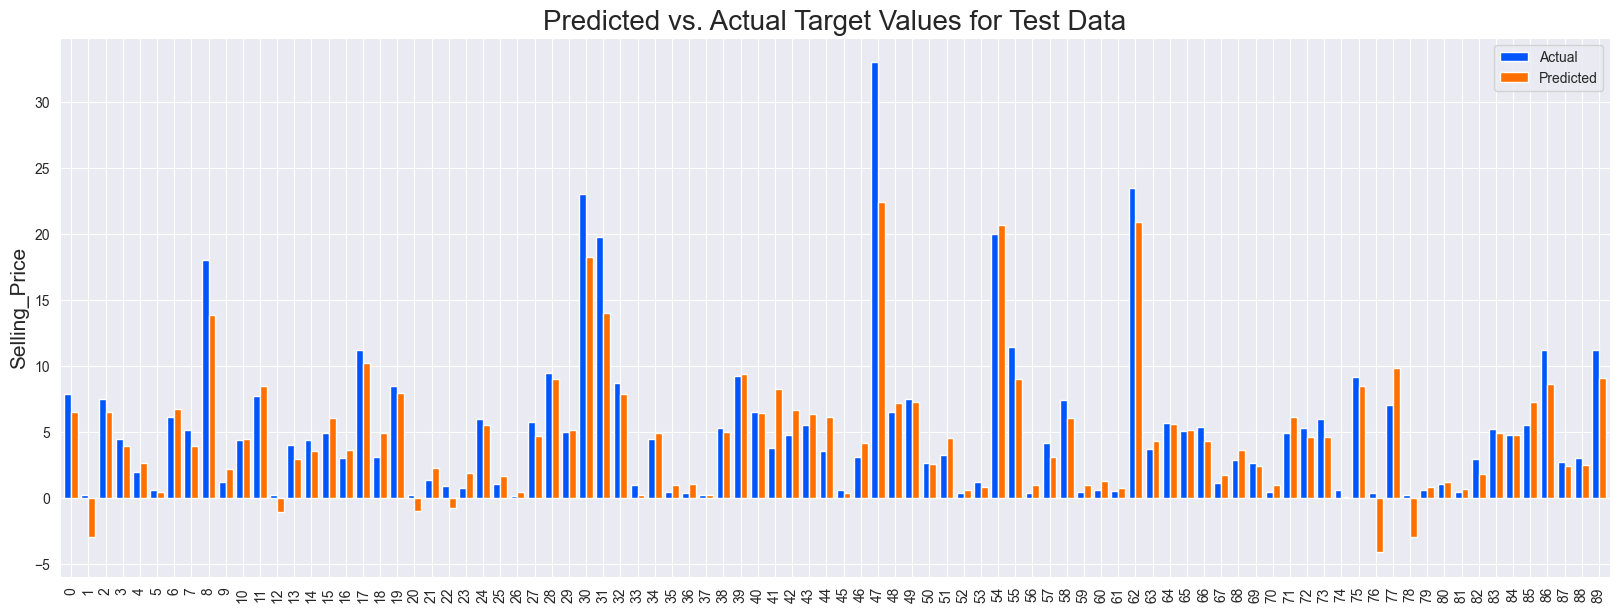

In [24]:
## Results Visualization: Let's create a dataframe with the actual and predicted values.

y_test_pred = linear_reg.predict(X_test_scaled)
df_comp = pd.DataFrame({'Actual':y_test_actual, 'Predicted':y_test_pred})

# Let's compare the actual and predicted target values for the test data with the help of a bar plot.

def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    df_comp.plot(y=['Actual','Predicted'], kind='bar', figsize=(20,7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Selling_Price', fontsize=15)
    plt.show()

compare_plot(df_comp)

In the above graph, the blue lines indicates the actual price and orange lines indicate the predicted price of the cars. You can see that some predicted values are negative. But in most of our cases, our model has predicted it pretty well.

# Supervised Learning: Classification

As a marketing manager, you want a set of customers who are most likely to purchase your product. This is how you can save your marketing budget by finding your audience. As a loan manager, you need to identify risky loan applications to achieve a lower loan default rate. This process of classifying customers into a group of potential and non-potential customers or safe or risky loan applications is known as a classification problem. Classification is a two-step process; a learning step and a prediction step. In the learning step, the model is developed based on given training data. In the prediction step, the model is used to predict the response to given data.

## Overview of Ensemble Methods

Think of ensemble methods like asking multiple friends for advice. Each friend might have a different opinion, and while some may be wrong, others could be right. If you combine everyone’s advice, you’ll make a better decision than just listening to one person. In machine learning, ensemble methods do the same—they ask many models (like different “friends”) to work together to give a better, more reliable answer.

Ensemble methods combine multiple models (usually referred to as “weak learners”) to form a stronger, more robust predictive model. Instead of relying on a single model, ensemble methods improve the performance of machine learning models by leveraging the collective power of several models. The idea is that while individual models may have limitations (e.g., overfitting or underfitting), combining them in a structured way allows for better generalization and more accurate predictions.

## Advantages and Disadvantages of Ensemble Methods

### Advantages:
1. **Improved Accuracy**: By combining multiple models, ensemble methods often achieve higher predictive performance than individual models. This is because different models can capture various aspects of the data, reducing the likelihood of errors.
2. **Less Likely to Make Mistakes**: When one model makes a mistake, others can compensate for it, making the overall system more reliable and less prone to errors.
3. **Robustness**: Ensembles are less sensitive to the noise and variance in the training data. They can handle diverse data patterns more effectively.
4. **Flexible Use**: They can be used for various types of prediction tasks, whether you're trying to classify emails as spam or not, or predict house prices.
5. **Feature Importance**: Some ensemble methods, like Random Forest, provide insights into feature importance, aiding in feature selection and understanding the underlying data structure.

### Disadvantages:
1. **Increased Computational Cost**: Training multiple models simultaneously or sequentially can be computationally intensive and time-consuming, especially with large datasets or complex models.
2. **Complexity**: Ensembles are generally more complex to implement and maintain compared to single models. This complexity can make them harder to interpret and debug.
3. **Hard to Understand How It Works**: While it's easy to see why one model made a certain decision, understanding why a group of models made a combined decision is much harder.
4. **Diminishing Returns**: Adding more models to an ensemble doesn’t always lead to significant performance improvements and can sometimes lead to overfitting if not properly managed.
5. **Resource Intensive**: Ensembles require more memory and storage, which can be a limitation in environments with constrained resources.

##Types of Ensemble Learning

### 1. Bagging (Bootstrap Aggregating)
Bagging is an ensemble technique that aims to reduce the variance of a machine learning model by creating multiple versions of the training dataset using bootstrapping (random sampling with replacement). Each model is trained independently on different subsets of the data, and the final prediction is made by averaging (in regression tasks) or taking a majority vote (in classification tasks).

#### Process:
- Randomly sample the training data with replacement.
- Train multiple independent models on these different subsets.
- Combine their outputs (averaging for regression, majority voting for classification).

#### Popular Bagging Method:
- **Random Forest** is a well-known bagging algorithm that trains many Decision Trees independently and combines their results to make a final prediction.

### 2. Boosting
Imagine you’re trying to fix a mistake in your homework. You ask a friend for help, and they try to correct it, but they miss some things. So, you ask another friend to focus on what the first friend missed. You repeat this process, and by the end, you’ve fixed all the mistakes. Boosting in machine learning works the same way—each model tries to fix the mistakes of the model before it, leading to a stronger final solution.

Boosting is an iterative ensemble method that focuses on reducing bias. In boosting, models are built sequentially, with each model trying to correct the errors made by the previous one. The key idea is to give more weight to the incorrectly predicted samples so that subsequent models can pay extra attention to them. This process continues, with each new model being trained on the errors of the previous models, thereby creating a strong model from many weak learners.

#### Process:
1. Train an initial model on the dataset.
2. Adjust the weights of misclassified samples to focus on harder cases.
3. Train the next model with updated weights.
4. Repeat this process, combining the results of all models to form the final prediction.

#### Popular Boosting Methods:
- **Gradient Boosting Machines (GBM)**, **AdaBoost**, and **XGBoost** are examples of boosting algorithms, where each model is trained to correct the mistakes of the previous one.

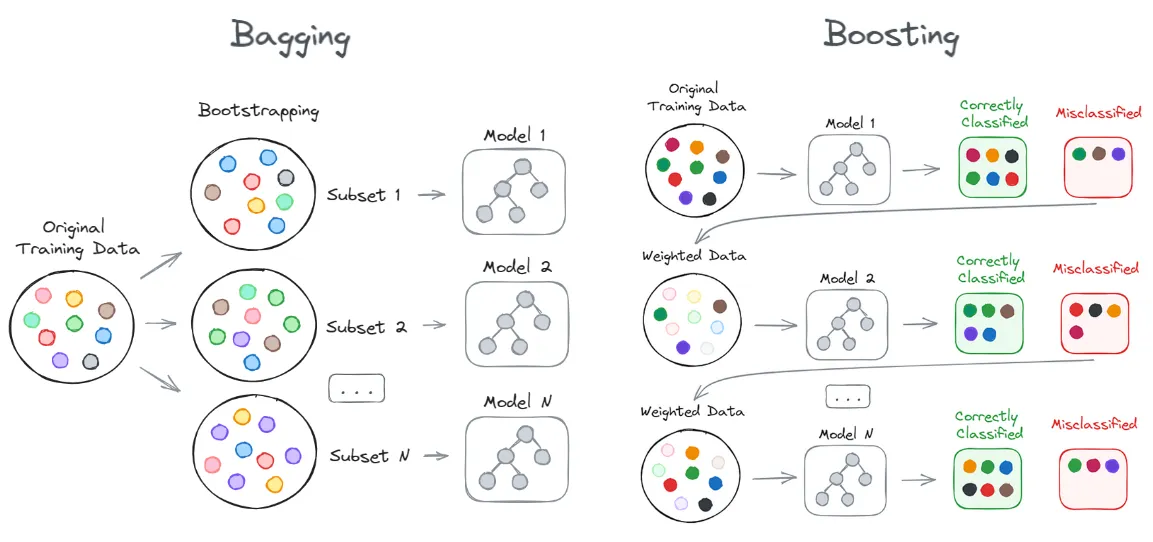

## Random Forests (RF)

### What is a Random Forest?
Random Forest is an ensemble method that aggregates predictions from multiple decision trees. It operates using a technique called **Bootstrap Aggregation (Bagging)** and randomly selects features for splitting nodes. The combination of these two techniques reduces variance and improves generalization. Random Forests are widely used for both classification and regression tasks, improving accuracy by mitigating the overfitting common to single decision trees.

### Key Concepts in Random Forest

#### 1. Decision Trees Recap
A decision tree is like a flowchart where each internal node represents a decision based on a feature, each branch represents the outcome of that decision, and each leaf node represents a final decision or prediction. Decision trees recursively split the dataset based on feature values to minimize a loss function (such as **Gini impurity** or **entropy** for classification and **mean squared error** for regression). The goal is to split the data in a way that maximizes the separation between classes (classification) or minimizes the prediction error (regression). In Random Forest, each decision tree is trained on a different subset of the data created through bootstrapping. Bagging helps reduce the variance of the model by training each tree on different samples, and the final output is determined by aggregating the outputs of all trees. For classification tasks, the trees' predictions are combined by majority voting, while for regression tasks, their predictions are averaged.

#### 2. Out-of-Bag (OOB) Error
For each decision tree, a random subset of the data is chosen for training via bootstrapping, and the data points not selected are called "out-of-bag" data. The **OOB error** is the average error for each data point, calculated using only the trees that did not include that data point in their training. This provides an unbiased estimate of the model’s performance. Out-of-Bag error is a way of measuring how well the Random Forest model performs without using a separate validation dataset. Since each tree is trained on a different subset of the data, some data points are left out. These "out-of-bag" data points are used to test the accuracy of each tree.

## How Random Forests Work

### 1. Bootstrapping (Creating Subsets of Data)
In Random Forest, the first step is to create different training datasets. Each decision tree in the forest is trained on a subset of the original data. This subset is created using a process called **bootstrapping**, where samples are taken randomly with replacement. Some data points may appear multiple times in a subset, while others might not appear at all. This variation in training data helps the model become more robust by reducing overfitting to any particular part of the dataset. Since each tree is trained on a different subset, the final model is less sensitive to noise or anomalies in the original dataset.

### 2. Random Feature Selection
In addition to randomly selecting data subsets, Random Forest also performs **random feature selection** when building each decision tree. At each node (split), only a random subset of features is considered for splitting, rather than using all features. This randomness increases diversity among the trees because different trees may be built using different features.

- **For classification tasks**: The number of features to consider at each split is typically the square root of the total number of features.
- **For regression tasks**: It is usually one-third of the total features.

**Key Benefit**: Random feature selection decreases the correlation between trees, which further reduces the overall model’s variance and makes the ensemble more robust.

### 3. Decision Trees in Random Forest
Each decision tree in the Random Forest is trained independently. The tree construction follows the standard process of recursive partitioning, where the data is split based on the feature that offers the best split according to a certain criterion:

- **For classification**: Gini impurity or entropy is often used to measure the purity of the nodes, with the goal of maximizing the separation between classes.
- **For regression**: Mean Squared Error (MSE) is used to split the data, aiming to minimize the error between predicted and actual values.

Each tree keeps splitting until certain stopping criteria are met, such as:

- Reaching a maximum depth.
- Reaching a minimum number of samples in a leaf node.
- No further improvement in the splitting criterion.

Each tree is a **weak learner**, meaning that on its own, it might not be very accurate. However, the combination of many weak learners in the Random Forest produces a strong model.

### 4. Aggregating Predictions (Voting/Averaging)
Once all the trees in the Random Forest are built, the model makes predictions by combining the outputs of all the trees.

- **For classification tasks**: The final class label is determined by **majority voting**. Each tree outputs a class, and the most frequent class across all trees is selected as the final prediction.
- **For regression tasks**: The final prediction is the **average** of the predictions from all the trees. This averaging helps to reduce the variance in the predictions.

This aggregation process significantly improves the accuracy and stability of the model compared to using a single decision tree.

### 5. Out-of-Bag (OOB) Error Estimation
During the bootstrapping process, about one-third of the original data is not included in the training sample for each tree. These **out-of-bag (OOB)** samples are used to estimate the performance of the Random Forest. For each OOB sample, predictions are made using only the trees that were not trained on that sample, and the average error over all OOB samples is called the **OOB error**.

OOB error serves as a built-in cross-validation technique, providing an unbiased estimate of the model’s generalization error without needing to create a separate validation dataset.

### 6. Reducing Variance and Overfitting
Single decision trees tend to overfit the training data, especially if they are grown deep. **Overfitting** occurs when the model captures noise or patterns that only exist in the training data but not in the unseen test data. Random Forest mitigates this by:

- **Averaging predictions**: The variance of individual trees' predictions is reduced by averaging their results, leading to a more robust and stable model.
- **Random feature selection**: By using different features for each tree, the model does not rely too heavily on any particular feature, further reducing overfitting.

While each individual tree might overfit, the combined output of many trees (through bagging) results in a model that generalizes better to new data.

### 7. Hyperparameters in Random Forest
To make Random Forest work optimally, several **hyperparameters** need to be tuned:

- **Number of Trees (n_estimators)**: Controls how many decision trees are built. More trees lead to better performance but also increase computation time.
- **Maximum Depth (max_depth)**: Limits how deep each tree can grow. Shallower trees are faster to train but may not capture complex patterns.
- **Minimum Samples per Leaf (min_samples_leaf)**: Defines the minimum number of data points a leaf node must have. If this number is too low, the model might overfit; if it’s too high, the model might underfit.
- **Maximum Features (max_features)**: Limits how many features (or columns) the model looks at when making a split. This randomness helps the model make better generalizations.

These hyperparameters need to be optimized based on the dataset to achieve the best performance.

## Practical Applications of Random Forest

- **Credit Scoring**: Banks use Random Forest to predict whether a customer will default on a loan based on their financial history.
- **Healthcare**: Random Forest is applied in medical diagnostics to predict diseases using patient data.
- **Fraud Detection**: Financial institutions and e-commerce platforms use Random Forest for detecting fraudulent transactions.
- **Customer Segmentation**: Companies use Random Forest to classify customers into different segments based on their purchasing behavior for better-targeted marketing.
- **Predicting Stock Prices**: Random Forest is used in financial markets to predict stock prices based on historical data.

# Gradient Boosting Machines (GBM)

## Introduction to Boosting

Boosting is an ensemble technique that converts weak learners (models that perform slightly better than random guessing) into strong learners by training models sequentially. Unlike bagging (e.g., Random Forest), where models are trained independently, boosting focuses on correcting errors from previous models. Each new model adjusts its weights to focus more on the mistakes of the earlier ones. The final model combines the outputs of all models to make a better overall prediction.

**Key Difference**:  
In boosting, models are trained one after the other, with each new model learning from the errors of the previous models. This is in contrast to bagging, where all models are trained in parallel.

## How Gradient Boosting Works

Gradient Boosting is a powerful boosting technique that builds models sequentially, with each model focusing on reducing the residual errors (the difference between the actual values and the predicted values) of the previous models. The key steps in Gradient Boosting are:

### Step 1: Initialize the Model
The process starts by making an initial guess about the outcome. The first model (often called the "initial model") is a simple one, such as predicting the mean of the target variable in the case of regression. In the case of classification, this might be the initial prediction of class probabilities (e.g., 0.5 for binary classification).

**Example (Regression)**:  
If we are predicting house prices, the initial model could predict the average house price for all houses in the dataset.

### Step 2: Calculate the Residuals (Errors)
After the first model makes predictions, we look at how far off these predictions are from the actual values. These differences are called residuals or errors. The residuals indicate how much the model's predictions need to be improved.

**Example**:  
If the actual house price is 300,000 dollars and the model predicts 280,000 dollars, the residual (error) is 20,000 dollars.

### Step 3: Train a New Model on the Residuals
The next step is to train a new model on the residuals rather than the original target variable. This new model aims to capture the structure in the residuals, essentially learning how to improve the current predictions.

**Example**:  
The new model might try to predict the $20,000 error (residual) from the first step, with the goal of making the final prediction more accurate.

### Step 4: Update the Predictions
The predictions from the new model are combined with the predictions of the previous model. This combination is controlled by a learning rate (shrinkage parameter), which ensures that changes are made in small steps to avoid overfitting. The process is repeated, and each subsequent model attempts to correct the errors of the combined previous models.

**New Prediction** = Previous Prediction + Learning Rate × New Model Prediction.

**Example**:  
If the original prediction was 280,000 dollars, and the second model predicts that we should add 15,000 dollars, the updated prediction becomes 295,000 dollars.

### Step 5: Repeat the Process
This boosting process is repeated for a fixed number of iterations (trees) or until the residual errors are small enough. Each new model reduces the prediction error step by step. The final prediction is the sum of the predictions from all models.

In Gradient Boosting, gradient descent is used to minimize a loss function (e.g., Mean Squared Error for regression or Log-Loss for classification). Gradient descent helps the model make adjustments to reduce its errors. It’s like adjusting your route when you're lost, using small corrections to find the best path. The model takes steps in the direction of the steepest decrease in the loss function, making gradual adjustments to improve predictions.

## Tuning Parameters in Gradient Boosting

1. **Learning Rate (Shrinkage)**:  
   This controls how much to adjust the predictions in each step. A smaller learning rate means slower but more accurate learning, while a larger learning rate speeds up the process but can lead to mistakes.

2. **Number of Trees (Iterations)**:  
   The number of trees refers to the number of models added sequentially. Increasing the number of trees generally improves performance, but after a certain point, it can cause overfitting.

3. **Max Depth**:  
   Max depth controls the complexity of each tree. A deeper tree can capture more complex patterns but might overfit the data. Typically, max depth is kept shallow in Gradient Boosting to prevent overfitting.

### **Random Forest vs. Gradient Boosting: Key Differences**

| **Aspect**                        | **Random Forest**                             | **Gradient Boosting**                             |
|-----------------------------------|-----------------------------------------------|--------------------------------------------------|
| **Model Complexity**              | Relatively simpler, with independent trees.   | More complex, as trees are built sequentially.   |
| **Training Time**                 | Faster because trees are built in parallel.   | Slower because trees are built one after the other. |
| **Interpretability**              | Easier to interpret than Gradient Boosting, but still challenging when many trees are involved. | Harder to interpret due to sequential learning and model complexity. |
| **Error Reduction**               | Reduces **variance**, focusing on reducing overfitting. | Reduces **bias**, focusing on improving accuracy at each step. |
| **Handling Overfitting**          | Good at preventing overfitting due to bagging and averaging. | Can overfit if not properly tuned (e.g., too many trees or high learning rate). |
| **Outliers Handling**             | More robust to outliers because individual trees are less sensitive. | More sensitive to outliers as each new tree tries to correct the previous mistakes. |
| **Performance on Large Datasets** | Performs well on large datasets, especially with many features. | Works well on large datasets but is slower due to the sequential nature of boosting. |
| **Handling Imbalanced Data**      | May need additional techniques (e.g., class weighting) to handle imbalanced data well. | Naturally performs better on imbalanced data due to focus on correcting mistakes. |
| **Hyperparameter Tuning**         | Less sensitive to hyperparameters; default settings often work well. | More sensitive to hyperparameters like learning rate and the number of trees; careful tuning is essential. |
| **Prediction Speed**              | Faster for making predictions, especially with more trees. | Slower for making predictions due to the sequential nature of boosting. |
| **Use Cases**                     | Good for general-purpose tasks, especially when speed and simplicity are needed. | Better for tasks where high accuracy is critical, even at the cost of training time. |
| **Out-of-the-box Performance**    | Works well with minimal tuning and gives good results quickly. | Requires more careful tuning to reach optimal performance. |

# Classifying an Email as Spam vs Non-Spam: Spambase Dataset Overview

## UCI Machine Learning Repository

The [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/94/spambase) is a well-known platform that hosts a large collection of datasets for machine learning research and experimentation. It includes datasets for a variety of tasks such as classification, regression, and clustering, and is widely used in both academic and industry research.

One of the many datasets available in this repository is the **Spambase dataset**, which is commonly used for the task of **email spam classification**. This dataset provides a rich source of information for building machine learning models to distinguish between spam and non-spam emails.

The **Spambase dataset** includes:

- 57 features extracted from the text of emails (e.g., the frequency of certain words and characters)
- A label indicating whether the email is **spam** or **non-spam**
- Over 4,600 examples of emails to train and test classification models

Researchers often use this dataset to benchmark different algorithms for spam detection, making it a valuable resource for understanding how machine learning models can be applied to email filtering tasks.

## Features

The Spambase dataset includes a variety of features that represent different aspects of the email content. These features are divided into three main categories:

1. **Word Frequency Features (48 features)**: These features represent the frequency (percentage) of specific words appearing in the email. Each feature is labeled with the pattern `word_freq_*`, where `*` corresponds to a specific word.

   - **Example**: 
     - `word_freq_make`: Percentage of words in the email that are "make".

2. **Character Frequency Features (6 features)**: These features represent the frequency (percentage) of specific characters appearing in the email. Each feature is labeled with the pattern `char_freq_*`, where `*` corresponds to a specific character.

   - **Example**: 
     - `char_freq_!`: Percentage of characters in the email that are exclamation marks (!).

3. **Capitalization Features (3 features)**: These features capture the frequency and patterns of capital letters in the email.

   - **Examples**:
     - `capital_run_length_average`: The average length of uninterrupted sequences of capital letters.
     - `capital_run_length_longest`: The length of the longest uninterrupted sequence of capital letters.
     - `capital_run_length_total`: The total number of capital letters in the email.

4. **Target Variable**:
   - The final column, **Class**, is the target variable. It indicates whether the email is classified as:
     - **Spam (1)** 
     - **Non-spam (0)**

## Goal

The classification task aims to predict whether an email is spam (1) or non-spam (0) based on the extracted features. This task is particularly useful for building automated **spam filters**, which can help prevent unwanted or malicious emails from reaching users' inboxes.

In [25]:
# First, install the ucimlrepo package to access UCI Machine Learning Repository datasets.
!pip install ucimlrepo

# Import the function `fetch_ucirepo` from the `ucimlrepo` package
from ucimlrepo import fetch_ucirepo

# Fetch the Spambase dataset from the UCI repository using the dataset ID (94).
# The dataset ID for Spambase is 94 in the UCI repository.
spambase = fetch_ucirepo(id=94)

In [26]:
# Now, extract the feature matrix (X) and target vector (y) from the fetched dataset.
# X contains the input features (word and character frequencies, capital run lengths, etc.).
# y contains the target variable, indicating whether an email is spam (1) or non-spam (0).
X = spambase.data.features  # All features/attributes of the dataset (word_freq_make, char_freq_!, etc.)
y = spambase.data.targets   # The target variable (spam = 1, not spam = 0)

In [27]:
# Print the metadata of the dataset, which includes information like dataset characteristics, 
# task type (classification), number of instances, number of features, and the dataset's description.
print(spambase.metadata)

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [28]:
# Print detailed information about the individual variables (features and target) in the dataset.
# This will give information about each feature, its type (continuous, integer), and its role (feature or target).
print(spambase.variables)

                          name     role        type demographic  \
0               word_freq_make  Feature  Continuous        None   
1            word_freq_address  Feature  Continuous        None   
2                word_freq_all  Feature  Continuous        None   
3                 word_freq_3d  Feature  Continuous        None   
4                word_freq_our  Feature  Continuous        None   
5               word_freq_over  Feature  Continuous        None   
6             word_freq_remove  Feature  Continuous        None   
7           word_freq_internet  Feature  Continuous        None   
8              word_freq_order  Feature  Continuous        None   
9               word_freq_mail  Feature  Continuous        None   
10           word_freq_receive  Feature  Continuous        None   
11              word_freq_will  Feature  Continuous        None   
12            word_freq_people  Feature  Continuous        None   
13            word_freq_report  Feature  Continuous        Non

In [29]:
# Step 1: Split the Data into Training and Testing Sets

# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
# X refers to the features (input variables) used to make predictions.
# y refers to the target variable (labels) that we aim to predict (spam or non-spam).

# Split the dataset into training and testing sets.
# train_test_split is a function that shuffles and splits the data into two subsets:
# - 80% for training the model (X_train and y_train)
# - 20% for testing the model's performance (X_test and y_test)

# Parameters:
# - X: The input features.
# - y: The target labels (spam or non-spam).
# - test_size=0.2: Reserves 20% of the data for testing, meaning 80% will be used for training.
# - random_state=42: Ensures reproducibility. The same split will occur every time the code is run.

# The function returns four objects:
# - X_train: The training subset of the input features.
# - X_test: The testing subset of the input features.
# - y_train: The training subset of the target variable.
# - y_test: The testing subset of the target variable.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
1370,0.09,0.00,0.09,0.0,0.39,0.09,0.09,0.00,0.19,0.29,...,0.0,0.000,0.139,0.000,0.310,0.155,0.00,6.813,494,1458
3038,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.124,0.124,0.000,0.000,0.000,0.00,1.800,8,45
2361,0.00,0.00,2.43,0.0,0.00,0.00,0.00,0.00,0.27,0.00,...,0.0,0.000,0.344,0.000,0.000,0.000,0.00,2.319,12,167
156,0.00,0.00,0.00,0.0,1.31,0.00,1.31,1.31,1.31,1.31,...,0.0,0.000,0.000,0.000,0.117,0.117,0.00,48.500,186,291
2526,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.00,2.307,8,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.122,0.081,0.000,0.000,0.04,3.891,70,323
466,0.00,0.23,0.00,0.0,0.23,0.47,0.00,0.47,0.00,0.95,...,0.0,0.000,0.121,0.040,0.000,0.040,0.00,3.780,55,189
3092,0.00,0.00,0.00,0.0,1.49,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.229,0.000,0.000,0.000,0.00,2.333,10,49
3772,0.00,0.23,0.00,0.0,0.00,0.23,0.00,0.46,0.00,0.00,...,0.0,0.063,0.063,0.000,0.159,0.000,0.00,1.616,13,173


In [31]:
X_test

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
3683,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.000,0.000,0.000,0.0,1.000,1,3
4412,0.71,0.0,0.71,0.0,0.00,0.00,0.00,0.00,0.00,0.71,...,0.0,0.00,0.000,0.000,0.000,0.000,0.0,1.032,2,32
2584,0.00,0.0,0.91,0.0,0.00,0.00,0.00,0.45,0.00,0.00,...,0.0,0.00,0.000,0.000,0.000,0.000,0.0,1.320,7,103
69,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.201,0.000,0.000,0.100,0.0,4.548,59,141
1844,0.00,0.0,0.54,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.188,0.047,0.000,0.000,0.0,1.745,12,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,0.16,0.0,0.67,0.0,0.33,0.16,0.33,0.84,0.16,0.50,...,0.0,0.00,0.224,0.000,1.151,0.056,0.0,4.928,63,621
4351,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.000,0.000,0.000,0.0,1.000,1,3
3027,0.00,0.0,1.60,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.250,0.000,0.000,0.000,0.0,2.065,12,95
3455,0.75,0.0,0.00,0.0,0.00,0.00,0.37,0.00,0.00,0.37,...,0.0,0.00,0.099,0.597,0.000,0.000,0.0,2.125,13,85


In [32]:
y_train

,Class
1370,1
3038,0
2361,0
156,1
2526,0
...,...
4426,0
466,1
3092,0
3772,0


In [33]:
y_test

,Class
3683,0
4412,0
2584,0
69,1
1844,0
...,...
1068,1
4351,0
3027,0
3455,0


In [34]:
# Step 2: Train and Evaluate a Random Forest Classifier

# Import the RandomForestClassifier from scikit-learn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with hyperparameters:
# - n_estimators=200: The number of decision trees (200 trees) in the forest.
# - max_depth=10: The maximum depth each tree is allowed to grow. Limiting the depth helps prevent overfitting.
# - min_samples_split=5: The minimum number of samples required to split a node. Controls how deep the tree will grow.
# - min_samples_leaf=4: The minimum number of samples required to be at a leaf node (the end of a tree branch).
# - max_features='sqrt': The number of features to consider when looking for the best split. 'sqrt' means square root of the total number of features.
# - bootstrap=True: Whether or not to use bootstrap sampling when building trees (samples with replacement).
# - random_state=42: Sets a random seed to ensure reproducibility. This means the same results will be produced each time the model is run.

rf_model = RandomForestClassifier(
    n_estimators=200,          
    max_depth=10,              
    min_samples_split=5,       
    min_samples_leaf=4,        
    max_features='sqrt',       
    bootstrap=True,            
    random_state=42            
)

In [35]:
# Train the Random Forest model on the training data.
# This step fits the Random Forest model to the features (X_train) and labels (y_train),
# meaning the model will learn patterns in the training data.
rf_model.fit(X_train, y_train)

/Users/tanyakhanna/mambaforge/envs/myenv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [36]:
# Make predictions using the trained Random Forest model on the test data (X_test).
# This step generates predicted labels (spam or non-spam) for the test dataset.
rf_pred = rf_model.predict(X_test)

In [37]:
# Now, evaluate the model using different metrics:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# - Accuracy: The percentage of correct predictions (both spam and non-spam) out of all predictions made.
rf_accuracy = accuracy_score(y_test, rf_pred)

# - Precision: The percentage of correctly predicted spam emails out of all emails predicted as spam.
rf_precision = precision_score(y_test, rf_pred)

# - Recall: The percentage of actual spam emails that were correctly predicted as spam by the model.
rf_recall = recall_score(y_test, rf_pred)

# - F1 Score: The harmonic mean of precision and recall. This is a good metric when there's an imbalance between the two.
rf_f1 = f1_score(y_test, rf_pred)

# - AUC-ROC: The Area Under the Receiver Operating Characteristic curve. It measures the model’s ability to distinguish between spam and non-spam. 
# It uses predicted probabilities from the model. A higher AUC indicates a better performance.
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Print the evaluation metrics to understand the performance of the Random Forest model.
print("Random Forest - Accuracy:", rf_accuracy)
print("Random Forest - Precision:", rf_precision)
print("Random Forest - Recall:", rf_recall)
print("Random Forest - F1 Score:", rf_f1)
print("Random Forest - AUC-ROC:", rf_auc)

Random Forest - Accuracy: 0.9413680781758957
Random Forest - Precision: 0.9719101123595506
Random Forest - Recall: 0.8871794871794871
Random Forest - F1 Score: 0.9276139410187667
Random Forest - AUC-ROC: 0.9824037857936163


In [38]:
# Step 3: Train and Evaluate a Gradient Boosting Classifier

# Import the GradientBoostingClassifier from scikit-learn's ensemble module
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier with hyperparameters:
# - n_estimators=200: The number of boosting stages (trees) to be used in the ensemble model.
# - learning_rate=0.05: The learning rate that scales the contribution of each tree. Lower values make the model learn slower, but often lead to better generalization.
# - max_depth=5: The maximum depth of each individual decision tree. Deeper trees can capture more complex patterns but may lead to overfitting.
# - min_samples_split=10: The minimum number of samples required to split an internal node in the tree.
# - min_samples_leaf=5: The minimum number of samples required at a leaf node (the end of a branch).
# - subsample=0.8: The fraction of samples (80%) used to train each individual tree. This introduces randomness and can help prevent overfitting.
# - max_features='sqrt': The number of features to consider when looking for the best split. 'sqrt' means square root of the total number of features.
# - random_state=42: Ensures the reproducibility of the results by setting a fixed random seed.

gbm_model = GradientBoostingClassifier(
    n_estimators=200,          
    learning_rate=0.05,        
    max_depth=5,               
    min_samples_split=10,      
    min_samples_leaf=5,        
    subsample=0.8,             
    max_features='sqrt',       
    random_state=42            
)

In [39]:
# Train the Gradient Boosting model on the training data.
# This step fits the model to the features (X_train) and labels (y_train), 
# allowing the model to learn patterns and relationships in the data through boosting.
gbm_model.fit(X_train, y_train)

/Users/tanyakhanna/mambaforge/envs/myenv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.05, max_depth=5, max_features='sqrt',
                           min_samples_leaf=5, min_samples_split=10,
                           n_estimators=200, random_state=42, subsample=0.8)

In [40]:
# Make predictions using the trained Gradient Boosting model on the test data (X_test).
# This step generates predicted labels (spam or non-spam) for the test dataset.
gbm_pred = gbm_model.predict(X_test)

In [41]:
# Evaluate the Gradient Boosting model using various performance metrics:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# - Accuracy: The proportion of correct predictions out of all predictions.
gbm_accuracy = accuracy_score(y_test, gbm_pred)

# - Precision: The proportion of true positive predictions (correctly predicted spam) out of all positive predictions (all emails predicted as spam).
gbm_precision = precision_score(y_test, gbm_pred)

# - Recall: The proportion of actual spam emails that were correctly predicted as spam by the model (also known as sensitivity or true positive rate).
gbm_recall = recall_score(y_test, gbm_pred)

# - F1 Score: The harmonic mean of precision and recall, providing a balance between the two.
gbm_f1 = f1_score(y_test, gbm_pred)

# - AUC-ROC: The Area Under the ROC curve. This metric evaluates the model's ability to distinguish between spam and non-spam, using the predicted probabilities.
# Higher AUC indicates better performance.
gbm_auc = roc_auc_score(y_test, gbm_model.predict_proba(X_test)[:, 1])

# Print the evaluation results to assess the performance of the Gradient Boosting model.
print("Gradient Boosting - Accuracy:", gbm_accuracy)
print("Gradient Boosting - Precision:", gbm_precision)
print("Gradient Boosting - Recall:", gbm_recall)
print("Gradient Boosting - F1 Score:", gbm_f1)
print("Gradient Boosting - AUC-ROC:", gbm_auc)

Gradient Boosting - Accuracy: 0.9576547231270358
Gradient Boosting - Precision: 0.9730458221024259
Gradient Boosting - Recall: 0.9256410256410257
Gradient Boosting - F1 Score: 0.9487516425755584
Gradient Boosting - AUC-ROC: 0.9874547298276113


In [42]:
import pandas as pd

# Create a comparison DataFrame with updated models
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'Accuracy': [rf_accuracy, gbm_accuracy],
    'Precision': [rf_precision, gbm_precision],
    'Recall': [rf_recall, gbm_recall],
    'F1 Score': [rf_f1, gbm_f1],
    'AUC-ROC': [rf_auc, gbm_auc]
})

# Display the comparison dataframe
comparison_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Random Forest,0.941368,0.971910,0.887179,0.927614,0.982404
1,Gradient Boosting,0.957655,0.973046,0.925641,0.948752,0.987455


Based on the evaluation results, both the Random Forest and Gradient Boosting models performed well in classifying spam and non-spam emails, with high accuracy, precision, recall, F1 score, and AUC-ROC values. The Gradient Boosting model slightly outperformed the Random Forest model in most metrics, achieving an accuracy of 95.77% compared to 94.14% for Random Forest. Gradient Boosting also demonstrated superior recall (92.56%) and F1 score (94.88%), indicating it effectively balances false positives and false negatives. Additionally, its AUC-ROC score of 0.987455 suggests that it has a strong ability to distinguish between spam and non-spam emails. Overall, while both models are robust, the Gradient Boosting classifier offers a marginally better performance in this classification task.

## Additional Resources

- [**Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition** by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)  

- [**Machine Learning Specialization** on Coursera](https://www.coursera.org/specializations/machine-learning-introduction)  

## THANK YOU!